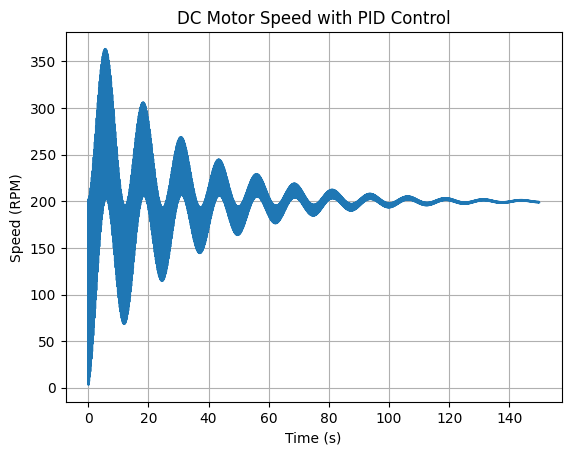

In [1]:
# PID Experiment 1

import matplotlib.pyplot as plt
import numpy as np

setpoint = 200  # Desired motor speed (RPM)
Kp = 0.1        # Proportional gain
Ki = 0.5        # Integral gain
Kd = 0.99       # Derivative gain
dt = 0.1        # Time step for simulation (seconds)
sim_time = 150  # Total simulation time (seconds)

integral = 0
previous_error = 0
motor_speed = 0  # Initial motor speed (RPM)

# Store data for plotting
time_data = []
speed_data = []

for t in np.arange(0, sim_time, dt):
    # Calculate error between setpoint and current motor speed
    error = setpoint - motor_speed

    # Proportional term
    P_out = Kp * error

    # Integral term (accumulation of past errors)
    integral += error * dt
    I_out = Ki * integral

    # Derivative term (rate of change of error)
    derivative = (error - previous_error) / dt
    D_out = Kd * derivative

     # Calculate the total control output
    control_output = P_out + I_out + D_out

    # Simulate the motor speed response (simplified linear response)
    motor_speed += control_output * dt

    # Update the previous error for the next iteration
    previous_error = error

    # Save data for plotting
    time_data.append(t)
    speed_data.append(motor_speed)

# Plot the motor speed over time
plt.plot(time_data, speed_data)
plt.title('DC Motor Speed with PID Control')
plt.xlabel('Time (s)')
plt.ylabel('Speed (RPM)')
plt.grid(True)
plt.show()

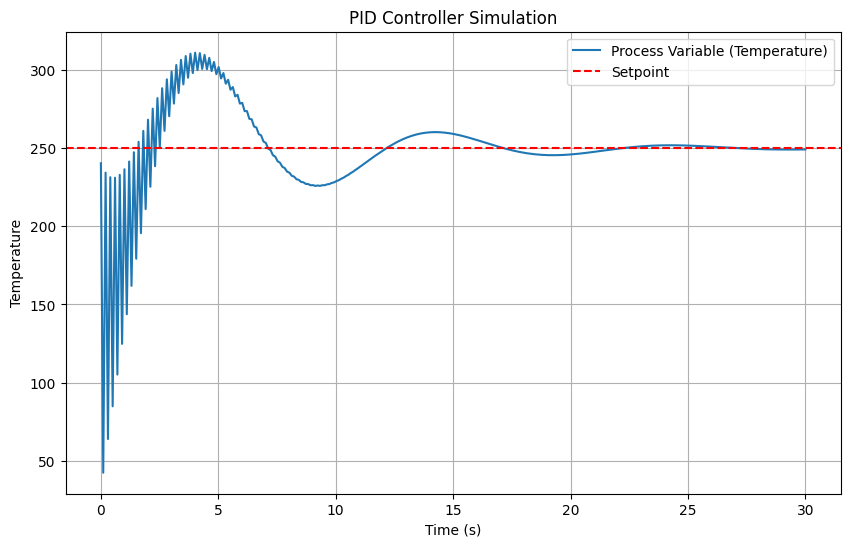

In [ ]:
#PID Controller 2

class PIDController:
  def __init__(self, Kp, Ki, Kd, setpoint):
    self.Kp = Kp
    self.Ki = Ki
    self.Kd = Kd
    self.setpoint = setpoint
    self.previous_error = 0
    self.integral = 0

  def compute(self, process_variable, dt):
    #Calculate error
    error = self.setpoint - process_variable

    #Proportional Term
    P_out = self.Kp * error

    #Integral Term
    self.integral += error * dt
    I_out = self.Ki * self.integral

    #Derivative Term
    derivative = (error - self.previous_error)/dt
    D_out = self.Kd * derivative

    #Compute Total Output
    output = P_out + I_out + D_out

    #Update Previous Error
    self.previous_error = error

    return output


import matplotlib.pyplot as plt
import numpy as np

#Initialize PID Controller
setpoint = 250 #Desired Temperature
pid = PIDController(Kp=0.5, Ki=0.8, Kd=0.9, setpoint=setpoint)

#Simulation Parameters
time = np.linspace(0,30,300) #10 Seconds, 100 Steps
dt = time[1] - time[0]
process_variable = 20 #Initial Temperature
process_values = []

#Simulate the Process
for t in time:
  #PID Control Output
  control_output = pid.compute(process_variable,dt)

  #Simulate process dynamics (heating rate proprtional to control output)
  process_variable += control_output * dt - 0.1 * (process_variable - 20) * dt #Heat Loss

  #Store the process variable
  process_values.append(process_variable)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, process_values, label='Process Variable (Temperature)')
plt.axhline(y=setpoint, color='r', linestyle='--', label='Setpoint')
plt.xlabel('Time (s)')
plt.ylabel('Temperature')
plt.title('PID Controller Simulation')
plt.legend()
plt.grid()
plt.show()

Text(0, 0.5, 'Temperature')

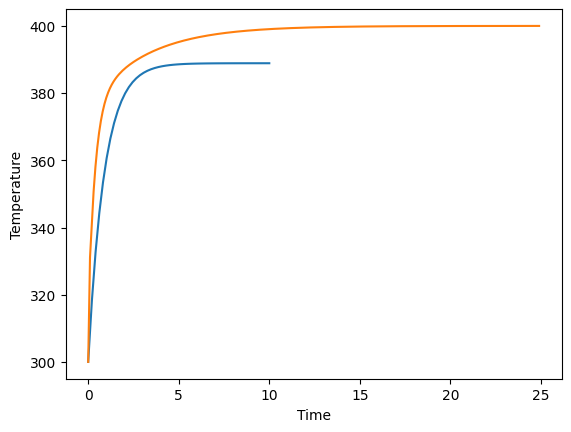

In [ ]:
#PID Experiment 3

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#Global Variables to Track the History of the Object
time = 0
integral = 0
time_prev = -1e-6
e_prev = 0

#Calculates the value of manipulated variable based on the measured value.
#(For example: Temperature we want vs the current temperature)

def PID(Kp, Ki, Kd, setpoint, measurement):
    global time, integral, time_prev, e_prev

    # Value of offset - when the error is equal zero
    offset = 320

    # PID calculations
    e = setpoint - measurement

    P = Kp*e
    integral = integral + Ki*e*(time - time_prev)
    D = Kd*(e - e_prev)/(time - time_prev)

    # calculate manipulated variable - MV
    MV = offset + P + integral + D

    # update stored data for next iteration
    e_prev = e
    time_prev = time
    return MV

def system(t, temp, Tq):
    epsilon = 1
    tau = 4
    Tf = 300
    Q = 2
    dTdt = 1/(tau*(1+epsilon)) * (Tf-temp) + Q/(1+epsilon)*(Tq-temp)
    return dTdt

tspan = np.linspace(0,10,50)
Tq = 400,
sol = odeint(system,300, tspan, args=Tq, tfirst=True)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.plot(tspan,sol)

#--------------------------------------------------------------------------
# number of steps
n = 250

time_prev = 0
y0 = 300
deltat = 0.1
y_sol = [y0]
t_sol = [time_prev]

q_sol = [Tq[0]]
setpoint = 400
integral = 0
for i in range(1, n):
    time = i * deltat
    tspan = np.linspace(time_prev, time, 10)
    Tq = PID(2.0, 0.9, 0.1, setpoint, y_sol[-1]),
    yi = odeint(system,y_sol[-1], tspan, args = Tq, tfirst=True)
    t_sol.append(time)
    y_sol.append(yi[-1][0])
    q_sol.append(Tq[0])
    time_prev = time

plt.plot(t_sol, y_sol)
plt.xlabel('Time')
plt.ylabel('Temperature')

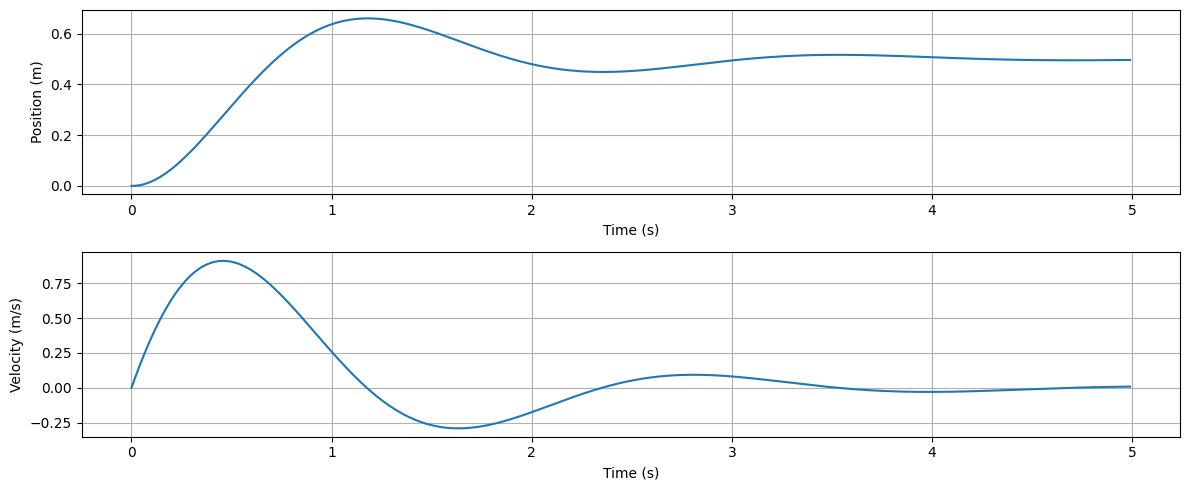

In [ ]:
#PID Experiment 4

import numpy as np
import matplotlib.pyplot as plt

#System Parameters
m = 5.0   #Mass (kg)
k = 40.0  #Spring Constant (N/m)
b = 10.0   #Damping Coefficient (Ns/m)

#Continuous Time Matrices
A = np.array([[0, 1],
              [-k/m, -b/m]])
B = np.array([[0],
              [1/m]])

#Discretization Parameters
dt = 0.01 #Time Steps
Ad = np.eye(2) + A*dt
Bd = B*dt

#Simulation Setup
n_steps = 500
x = np.array([[0],  #Initial State: [Position = 0 m, Velocity = 0 m/s]
              [0]])
u = 20.0            #Constant Applied Force (N)

x_history = []
time_history = []

for i in range(n_steps):
  time = i*dt
  x_history.append(x.flatten())
  time_history.append(time)

  x = Ad @ x + Bd * u

x_history = np.array(x_history)

# Plot results
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(time_history, x_history[:,0], label="Position (m)")
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(time_history, x_history[:,1], label="Velocity (m/s)")
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)

plt.tight_layout()
plt.show()